In [2]:
import instaloader
import pandas as pd

In [9]:
L = instaloader.Instaloader()
L.load_session_from_file('kristaamathew')

profile_name = 'hollister'
profile = instaloader.Profile.from_username(L.context, profile_name)

Loaded session from C:\Users\krist\AppData\Local\Instaloader\session-kristaamathew.


In [21]:
posts = profile.get_posts()
data = []

In [22]:
for post in profile.get_posts():
    post_id = post.mediaid
    platform = "Instagram"
    date_posted = post.date_utc
    content_type = "Video" if post.is_video else "Image"
    post_text = post.caption or ""
    media_length = post.video_duration if post.is_video else None
    likes = post.likes
    comments = post.comments
    engagement_count = likes + comments

    data.append({
        'Post_ID': post_id,
        'Platform': platform,
        'Date_Posted': date_posted,
        'Content_Type': content_type,
        'Post_Text': post_text,
        'Media_Length': media_length,
        'Engagement_Count': engagement_count,
        'Likes': likes,
        'Comments': comments,
    })

    if len(data) >= max_posts:
        break

In [ ]:
df = pd.DataFrame(data)
print(df.head(20))


                Post_ID   Platform         Date_Posted Content_Type  \
0   3718767900250503451  Instagram 2025-09-10 19:15:33        Video   
1   3723725506106798081  Instagram 2025-09-17 15:24:53        Image   
2   3722952267440995274  Instagram 2025-09-16 13:48:36        Image   
3   3721000219023657668  Instagram 2025-09-13 21:10:14        Image   
4   3720909955110152654  Instagram 2025-09-13 18:11:19        Video   
5   3720140387299239483  Instagram 2025-09-12 16:41:54        Image   
6   3719499370703250979  Instagram 2025-09-11 19:28:41        Video   
7   3719438951418462443  Instagram 2025-09-11 17:30:57        Image   
8   3718678593435213157  Instagram 2025-09-10 16:18:23        Video   
9   3718022349544388503  Instagram 2025-09-09 18:33:44        Image   
10  3716439519114707452  Instagram 2025-09-07 14:10:02        Video   
11  3715996718807777540  Instagram 2025-09-06 23:29:10        Image   
12  3715869426505037154  Instagram 2025-09-06 19:16:16        Image   
13  37

In [26]:
estimated_reach = 10000
df['Engagement_Rate'] = df['Engagement_Count'] / estimated_reach
print(df[['Post_ID', 'Engagement_Rate']])

                Post_ID  Engagement_Rate
0   3718767900250503451           9.9405
1   3723725506106798081           0.0814
2   3722952267440995274           0.0955
3   3721000219023657668           0.5572
4   3720909955110152654           0.7076
5   3720140387299239483           0.7014
6   3719499370703250979           0.6490
7   3719438951418462443           0.3573
8   3718678593435213157           1.8316
9   3718022349544388503           1.3141
10  3716439519114707452           1.9358
11  3715996718807777540           0.1494
12  3715869426505037154           0.0037
13  3715858444742929603           0.2449
14  3715031286303104700           0.1435
15  3714486956643488834           0.2785
16  3714416629607490463           3.6719
17  3714354485926990254           1.9756
18  3713745945399030425           0.3713
19  3713669450051806791           2.1351


In [25]:
df.to_csv('hollister_instagram_posts.csv', index=False)

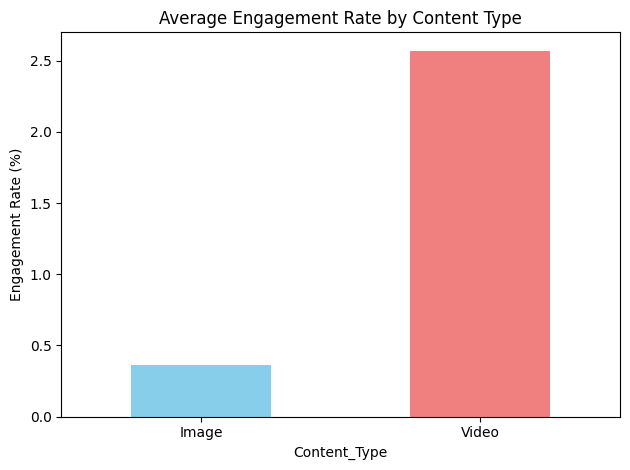

In [28]:
import matplotlib.pyplot as plt

avg_by_type = df.groupby('Content_Type')['Engagement_Rate'].mean()
avg_by_type.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Engagement Rate by Content Type')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

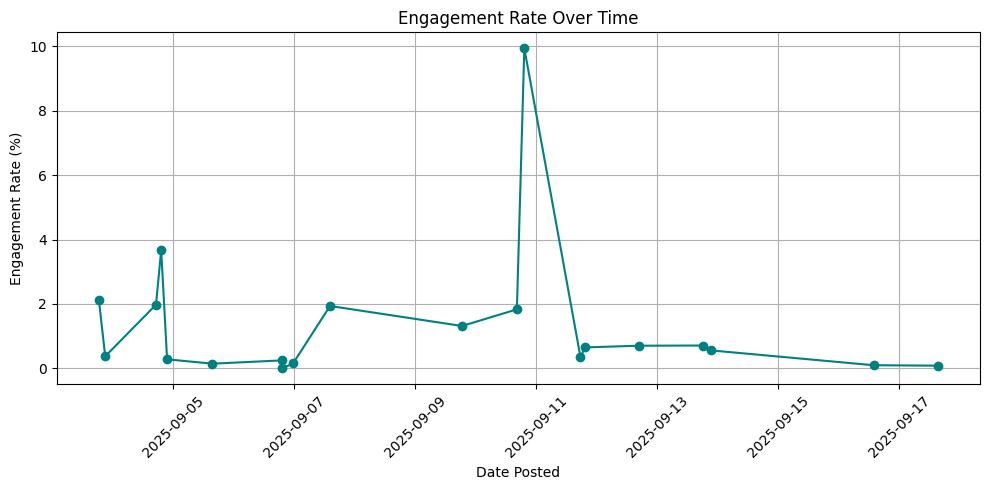

In [29]:
df_sorted = df.sort_values('Date_Posted')
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date_Posted'], df_sorted['Engagement_Rate'], marker='o', linestyle='-', color='teal')
plt.title('Engagement Rate Over Time')
plt.xlabel('Date Posted')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

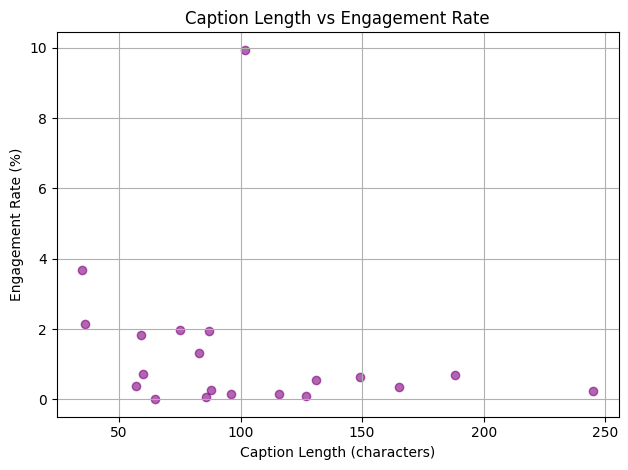

In [30]:
df['Caption_Length'] = df['Post_Text'].apply(lambda x: len(x) if x else 0)

plt.scatter(df['Caption_Length'], df['Engagement_Rate'], alpha=0.6, color='purple')
plt.title('Caption Length vs Engagement Rate')
plt.xlabel('Caption Length (characters)')
plt.ylabel('Engagement Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

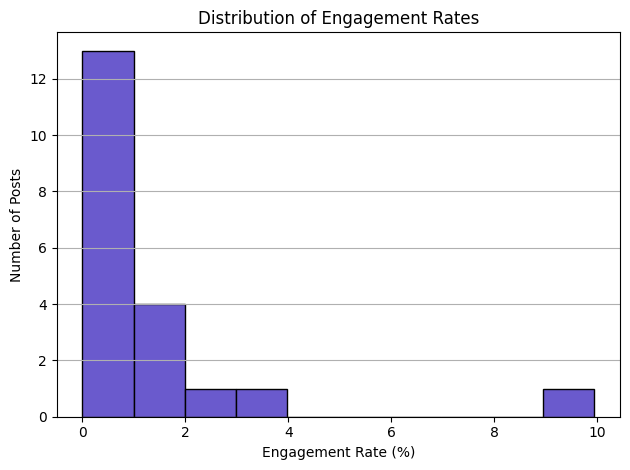

In [31]:
df['Engagement_Rate'].plot.hist(bins=10, color='slateblue', edgecolor='black')
plt.title('Distribution of Engagement Rates')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Number of Posts')
plt.grid(axis='y')
plt.tight_layout()
plt.show()